In this implementation:
- Missing values are treated as a separate category i.e. we do not replace missing values with NaN.
- Use 99:1 train to validation set ratio.


In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *

In [3]:
# Set printing options. 
# These options determine the way floating point numbers, arrays and
# other NumPy objects are displayed.
np.set_printoptions(threshold=50, edgeitems=20)

### Set data path

In [4]:
#PATH = 'data/porto-seguro/'
PATH = '/home/jd/data/PortoDriver/'

### Read csv data into dataframe

In [5]:
train_data_df = pd.read_csv(f'{PATH}train.csv')
test_data_df = pd.read_csv(f'{PATH}test.csv')

# I need differant Path
#train_data_df = pd.read_csv(f'{PATH}train/train.csv')
#test_data_df = pd.read_csv(f'{PATH}test/test.csv')

In [6]:
# test_data need target
test_data_df['target']=0

### List of column names

In [7]:
all_var = [var for var in train_data_df.columns]

In [8]:
all_var

['id',
 'target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

### Create list of categorical and continuous variables

In [9]:
cat_vars = [var for var in train_data_df.columns if var.endswith('cat')]
bin_vars = [var for var in train_data_df.columns if var.endswith('bin')]
ind_vars = ['ps_ind_01', 'ps_ind_03','ps_ind_14', 'ps_ind_15']
cat_vars = cat_vars + bin_vars #+ ind_vars
cat_vars

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [10]:
cont_vars = [var for var in train_data_df.columns if var not in cat_vars]
cont_vars

['id',
 'target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [11]:
for var in cat_vars: 
    train_data_df[var] = train_data_df[var].astype('category').cat.as_ordered()
    test_data_df[var] = test_data_df[var].astype('category').cat.as_ordered()

In [12]:
for var in cont_vars:
    train_data_df[var] = train_data_df[var].astype('float32')
    test_data_df[var] = test_data_df[var].astype('float32')

In [13]:
cont_vars[1]

'target'

In [14]:
del cont_vars[1]

In [15]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null float32
target            595212 non-null float32
ps_ind_01         595212 non-null float32
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null float32
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null float32
ps_ind_15         595212 non-null float32
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null f

### Display training data sample

In [16]:
train_data_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7.0,0.0,2.0,2,5.0,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0,1,1,0,0,1
1,9.0,0.0,1.0,1,7.0,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0,1,1,0,1,0
2,13.0,0.0,5.0,4,9.0,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0,1,1,0,1,0
3,16.0,0.0,0.0,1,2.0,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0,0,0,0,0,0
4,17.0,0.0,0.0,2,0.0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0,0,0,1,1,0


### Display test data sample

In [17]:
test_data_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,0.0,0.0,1,8.0,1,0,0,1,0,0,...,1.0,1.0,12.0,0,1,1,0,0,1,0.0
1,1.0,4.0,2,5.0,1,0,0,0,0,1,...,0.0,3.0,10.0,0,0,1,1,0,1,0.0
2,2.0,5.0,1,3.0,0,0,0,0,0,1,...,0.0,2.0,4.0,0,0,0,0,0,0,0.0
3,3.0,0.0,1,6.0,0,0,1,0,0,0,...,1.0,0.0,5.0,1,0,1,0,0,0,0.0
4,4.0,5.0,1,7.0,0,0,0,0,0,1,...,0.0,0.0,4.0,0,1,1,0,0,1,0.0


### Create validation set indices

In [18]:
# Tune VAL_PCT hyperparameter
# Tune MAX_FOLDS hyperparameter
VAL_FRAC = 0.01
MAX_FOLDS = 5

num_obs = train_data_df.shape[0]

cv_dict = {f'ids_fold_{num_fold}': get_cv_idxs(n=num_obs, cv_idx=num_fold, val_pct=VAL_FRAC) for num_fold in range(MAX_FOLDS)}

In [19]:
len(cv_dict['ids_fold_0'])

5952

### Set response variable

In [20]:
TARGET_VAR = "target"

### Train set, response variable, feature scaling

In [21]:
# This function is giving weird numbers to id
train, target, nas, mapper = proc_df(df=train_data_df, y_fld=TARGET_VAR, do_scale=True)

# for test
test_df, target2, nas2, mapper2 = proc_df(df=test_data_df, y_fld=TARGET_VAR, do_scale=True, #skip_flds=['id'],
                                  mapper=mapper, na_dict=nas)

In [22]:
# Reset Id doesnt appear to work
#train.id =train_data_df.id
#test_df.id=test_data_df.id

In [23]:
train.id

0        -1.732308
1        -1.732303
2        -1.732294
3        -1.732287
4        -1.732284
5        -1.732280
6        -1.732277
7        -1.732273
8        -1.732263
9        -1.732259
10       -1.732245
11       -1.732242
12       -1.732240
13       -1.732224
14       -1.732217
15       -1.732212
16       -1.732207
17       -1.732189
18       -1.732182
19       -1.732175
20       -1.732172
21       -1.732170
22       -1.732156
23       -1.732152
24       -1.732145
25       -1.732142
26       -1.732140
27       -1.732138
28       -1.732128
29       -1.732126
            ...   
595182    1.733111
595183    1.733125
595184    1.733127
595185    1.733132
595186    1.733139
595187    1.733141
595188    1.733151
595189    1.733153
595190    1.733155
595191    1.733165
595192    1.733176
595193    1.733181
595194    1.733183
595195    1.733193
595196    1.733200
595197    1.733211
595198    1.733216
595199    1.733221
595200    1.733225
595201    1.733230
595202    1.733242
595203    1.

### Convert categorical values to type `category`

In [24]:
for var in cat_vars: 
    train[var] = train[var].astype('category').cat.as_ordered()
    test_df[var] = test_df[var].astype('category').cat.as_ordered()

### Convert remaining variables to `float32`

In [25]:
for var in cont_vars:
    train[var] = train[var].astype('float32')
    test_df[var] = test_df[var].astype('float32')

target.astype('float32')

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
       ...,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
id                595212 non-null float32
ps_ind_01         595212 non-null float32
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null float32
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null float32
ps_ind_15         595212 non-null float32
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null float32
ps_reg_02         595212 non-null f

### Gini metric

In [27]:
from sklearn.metrics import roc_auc_score

inv_log = lambda x : np.exp(x)

def gini_metric(preds, targs):
    preds = inv_log(preds)
    auc = roc_auc_score(y_true=targs, y_score=preds)
    return 2 * auc - 1

### Create embeddings

In [28]:
cat_sz = [(c, len(train[c].cat.categories) + 1) for c in cat_vars]

In [29]:
cat_sz

[('ps_ind_02_cat', 6),
 ('ps_ind_04_cat', 4),
 ('ps_ind_05_cat', 9),
 ('ps_car_01_cat', 14),
 ('ps_car_02_cat', 4),
 ('ps_car_03_cat', 4),
 ('ps_car_04_cat', 11),
 ('ps_car_05_cat', 4),
 ('ps_car_06_cat', 19),
 ('ps_car_07_cat', 4),
 ('ps_car_08_cat', 3),
 ('ps_car_09_cat', 7),
 ('ps_car_10_cat', 4),
 ('ps_car_11_cat', 105),
 ('ps_ind_06_bin', 3),
 ('ps_ind_07_bin', 3),
 ('ps_ind_08_bin', 3),
 ('ps_ind_09_bin', 3),
 ('ps_ind_10_bin', 3),
 ('ps_ind_11_bin', 3),
 ('ps_ind_12_bin', 3),
 ('ps_ind_13_bin', 3),
 ('ps_ind_16_bin', 3),
 ('ps_ind_17_bin', 3),
 ('ps_ind_18_bin', 3),
 ('ps_calc_15_bin', 3),
 ('ps_calc_16_bin', 3),
 ('ps_calc_17_bin', 3),
 ('ps_calc_18_bin', 3),
 ('ps_calc_19_bin', 3),
 ('ps_calc_20_bin', 3)]

In [30]:
emb_szs = [(c, min(100, (c + 1) // 2)) for _, c in cat_sz]

In [31]:
emb_szs

[(6, 3),
 (4, 2),
 (9, 5),
 (14, 7),
 (4, 2),
 (4, 2),
 (11, 6),
 (4, 2),
 (19, 10),
 (4, 2),
 (3, 2),
 (7, 4),
 (4, 2),
 (105, 53),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2)]

### Model Architecture / Hyperparameters

In [32]:
layer_1 = 1024
layer_2 = 512
layer_3 = 256
batch_size = 256
embed_dropout = 0.01
layer_dropout = 0.15

In [33]:
# Original
# Create model with all category variables
#md = ColumnarModelData.from_data_frame(path=PATH, 
#                                       val_idxs=cv_dict['ids_fold_0'], 
#                                       df=train, 
#                                       y=target, 
#                                       cat_flds=cat_vars, 
#                                       bs=batch_size)

In [34]:
# Create model with a test to allow for predictions
md = ColumnarModelData.from_data_frame(path=PATH, 
                                       val_idxs=cv_dict['ids_fold_0'], 
                                       df=train, 
                                       y=target, 
                                       cat_flds=cat_vars, 
                                       bs=batch_size,
                                       test_df=test_df)

### Model learner

In [35]:
# Use all categorical variables
m = md.get_learner(emb_szs=emb_szs, 
                   n_cont=(len(train.columns) - len(cat_vars)),
                   emb_drop=embed_dropout, 
                   out_sz=1, 
                   szs=[layer_1, layer_2], 
                   drops=[layer_dropout, layer_dropout], 
                   y_range=None)


In [36]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 66%|██████▋   | 1528/2302 [00:14<00:07, 106.12it/s, loss=464]   

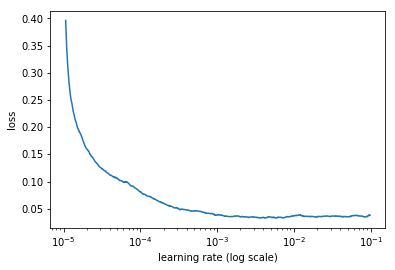

In [37]:
m.sched.plot()

In [38]:
lr = 0.0001

In [39]:
m.fit(lrs=lr, n_cycle=5, metrics=[accuracy, gini_metric])

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))


  4%|▍         | 101/2302 [00:02<00:57, 38.50it/s, loss=0.103]


  9%|▊         | 199/2302 [00:04<00:44, 46.77it/s, loss=0.0717]


 14%|█▍        | 318/2302 [00:05<00:32, 61.54it/s, loss=0.0544]


 14%|█▍        | 332/2302 [00:05<00:31, 63.51it/s, loss=0.0545]

 15%|█▌        | 346/2302 [00:05<00:30, 63.77it/s, loss=0.0512]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 0.       0.03736  0.03566  0.96276  0.20353]                   
[ 1.       0.03654  0.0356   0.96276  0.23433]                   
[ 2.       0.03459  0.03562  0.96276  0.23572]                   
 30%|███       | 693/2302 [00:07<00:17, 89.61it/s, loss=0.0346]


KeyboardInterrupt: 

In [ ]:
m.fit(lrs=lr, n_cycle=2, cycle_len=2, metrics=[accuracy, gini_metric], cycle_mult=2)

In [40]:
# Predictions for the validation set
m.predict()

array([[ 0.05726],
       [ 0.0326 ],
       [ 0.03019],
       [ 0.0334 ],
       [ 0.03027],
       [ 0.01851],
       [ 0.01438],
       [ 0.02205],
       [ 0.04991],
       [ 0.03663],
       [ 0.01339],
       [ 0.02846],
       [ 0.01517],
       [ 0.01232],
       [ 0.02084],
       [ 0.04754],
       [ 0.02688],
       [ 0.02279],
       [ 0.00885],
       [ 0.01244],
       ..., 
       [ 0.01634],
       [ 0.01799],
       [ 0.01943],
       [ 0.04611],
       [ 0.04447],
       [ 0.028  ],
       [ 0.01583],
       [ 0.02186],
       [ 0.00889],
       [ 0.02185],
       [ 0.01871],
       [ 0.049  ],
       [ 0.04213],
       [ 0.02635],
       [ 0.07306],
       [ 0.0512 ],
       [ 0.02695],
       [ 0.0282 ],
       [ 0.02244],
       [ 0.0171 ]], dtype=float32)

In [41]:
m

MixedInputModel (
  (embs): ModuleList (
    (0): Embedding(6, 3)
    (1): Embedding(4, 2)
    (2): Embedding(9, 5)
    (3): Embedding(14, 7)
    (4): Embedding(4, 2)
    (5): Embedding(4, 2)
    (6): Embedding(11, 6)
    (7): Embedding(4, 2)
    (8): Embedding(19, 10)
    (9): Embedding(4, 2)
    (10): Embedding(3, 2)
    (11): Embedding(7, 4)
    (12): Embedding(4, 2)
    (13): Embedding(105, 53)
    (14): Embedding(3, 2)
    (15): Embedding(3, 2)
    (16): Embedding(3, 2)
    (17): Embedding(3, 2)
    (18): Embedding(3, 2)
    (19): Embedding(3, 2)
    (20): Embedding(3, 2)
    (21): Embedding(3, 2)
    (22): Embedding(3, 2)
    (23): Embedding(3, 2)
    (24): Embedding(3, 2)
    (25): Embedding(3, 2)
    (26): Embedding(3, 2)
    (27): Embedding(3, 2)
    (28): Embedding(3, 2)
    (29): Embedding(3, 2)
    (30): Embedding(3, 2)
  )
  (lins): ModuleList (
    (0): Linear (163 -> 1024)
    (1): Linear (1024 -> 512)
  )
  (bns): ModuleList (
    (0): BatchNorm1d(1024, eps=1e-05, momen

## Prediction

In [42]:
m.save('val0')

In [43]:
m.load('val0')

In [44]:
x,y=m.predict_with_targs()

In [45]:
gini_metric(x,y)

0.22491474879416606

In [46]:
pred_test=m.predict(True)

 30%|███       | 693/2302 [00:20<00:46, 34.62it/s, loss=0.0346]

In [47]:
# add a predictions column to the test_df
test_df['pred_target']=pred_test

In [48]:
test_df['pred_target'][:5]

0    0.015805
1    0.022001
2    0.018904
3    0.012918
4    0.029688
Name: pred_target, dtype: float32

## Analyze

In [49]:
test_df.pred_target.max(), test_df.pred_target.min()

(0.23114759, -0.045763865)

In [50]:
test_df.nlargest(5, 'pred_target')

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,pred_target
273834,-0.669384,-0.453868,2,0.583978,2,8,1,2,1,1,...,-0.367359,1.255373,0.895991,2,1,2,1,1,1,0.231148
260327,-0.721633,0.554304,3,-1.638327,2,1,1,1,2,1,...,-1.198640,0.665362,-0.560329,1,2,1,2,1,1,0.220656
605236,0.617500,1.562477,2,0.213594,2,3,1,2,1,1,...,-0.367359,3.025403,0.167831,2,2,1,1,2,1,0.215952
153604,-1.136613,-0.453868,3,-1.638327,3,1,1,2,1,1,...,-1.198640,0.075352,0.531911,1,2,1,1,2,1,0.208758
363211,-0.321721,1.058390,2,0.213594,2,3,1,1,2,1,...,0.463923,-1.694679,0.895991,1,2,2,2,1,1,0.204727


In [51]:
test_df.nsmallest(5, 'pred_target')

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,pred_target
889828,1.721888,-0.453868,2,1.324746,2,2,2,1,1,1,...,0.463923,0.075352,2.716391,1,1,2,2,1,1,-0.045764
813982,1.427967,-0.453868,2,0.583978,2,2,2,1,1,1,...,2.957769,1.255373,0.895991,1,2,1,1,1,1,-0.040055
682511,0.917502,1.562477,2,0.213594,2,3,2,1,1,1,...,-0.367359,0.075352,-0.924409,1,2,1,2,1,1,-0.037608
112522,-1.295712,1.058390,2,2.065515,2,2,2,1,1,1,...,0.463923,-0.514659,1.624151,1,2,1,2,1,1,-0.036175
890454,1.724261,0.050218,2,1.695130,3,2,2,1,1,1,...,-1.198640,0.075352,1.260071,1,2,1,2,1,1,-0.036003


## Submission

In [52]:
## Sets up the test use
submission = pd.DataFrame({'id': test_data_df.id, 'target': test_df.pred_target})
submission.id = submission.id.astype(int)
# Shows 5 to ensure formatting is correct
submission[:10]

,id,target
0,0,0.015805
1,1,0.022001
2,2,0.018904
3,3,0.012918
4,4,0.029688
5,5,0.041468
6,6,0.025827
7,8,0.021399
8,10,0.074200
9,11,0.043967


In [53]:
# Makes the submission name out of folders
path3 = PATH +'submits/'
## labels submissions in order
numFiles=len(os.listdir(path3))
subm_name = 'submission'+str(numFiles)+'.csv.gz'

In [54]:
## prints it out to downloaded
submission.to_csv((path3+subm_name), index=False, compression='gzip')
print ('http://localhost:8888/view/data/PortoDriver/submits/'+subm_name)

http://localhost:8888/view/data/PortoDriver/submits/submission24.csv.gz
